# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin",language="en")

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum",language="en")
                                          
eth_headlines

{'status': 'ok',
 'totalResults': 1316,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
   'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
   'url': 'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
   'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
   'publishedAt': '2020-11-23T14:16:00Z',
   'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - R

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.0,0.838
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.0,0.826
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.0,0.928
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.0,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.0,1.000


In [8]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
3,2020-12-16,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.0,1.000
4,2020-12-16,FILE PHOTO: A representation of virtual curren...,0.0000,0.000,0.0,1.000


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.238942,0.070053,0.009368,0.920579
std,0.357613,0.079392,0.028447,0.083627
min,-0.585900,0.000000,0.000000,0.773000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.202300,0.050000,0.000000,0.950000
75%,0.532650,0.157000,0.000000,1.000000
max,0.801600,0.209000,0.103000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.073660,0.045400,0.016800,0.937800
std,0.279728,0.077994,0.052501,0.106015
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.931500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.177900,0.068250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
# opting to not expand stopwords list

In [13]:
# Complete the tokenizer function
stop = stopwords.words("english")
lemma = WordNetLemmatizer()

btc_tokens = []
eth_tokens =[]

def tokenizer(text):
    words= word_tokenize(text)
    words = [str(word).lower() for word in words]
    words = [word for word in words if word not in punctuation]
    words = [word for word in words if word not in stop]
    words = [lemma.lemmatize(word) for word in words ]
    
    return words


In [14]:
btc_tokens = btc_df["text"].apply(tokenizer)

In [15]:
# Create a new tokens column for bitcoin
btc_df['tokens'] = btc_tokens


In [16]:
eth_tokens = eth_df["text"].apply(tokenizer)

In [17]:
# Create a new tokens column for ethereum
eth_df['tokens'] = eth_tokens


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
#bigram_counts_btc = Counter(btc_tokens, n=2)

btc_ngrams = ngrams(tokenizer(btc_df["text"].str.cat()),n=2)


In [20]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = ngrams(tokenizer(eth_df["text"].str.cat()),n=2)

In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Get the top 10 words for Bitcoin
btc_token_count = token_count(tokenizer(btc_df["text"].str.cat()))
btc_token_count

[('char', 19),
 ('bitcoin', 16),
 ('november', 6),
 ('2020', 6),
 ('photo', 6),
 ('cryptocurrency', 5),
 ('illustration', 5),
 ('reuters', 5),
 ('taken', 5),
 ('price', 4)]

In [23]:
# Get the top 10 words for Ethereum
eth_token_count = token_count(tokenizer(eth_df["text"].str.cat()))
eth_token_count

[('char', 20),
 ('reuters', 17),
 ('photo', 13),
 ('bitcoin', 13),
 ('representation', 12),
 ('virtual', 12),
 ('currency', 12),
 ('taken', 12),
 ('illustration', 11),
 ('reuters/dado', 11)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

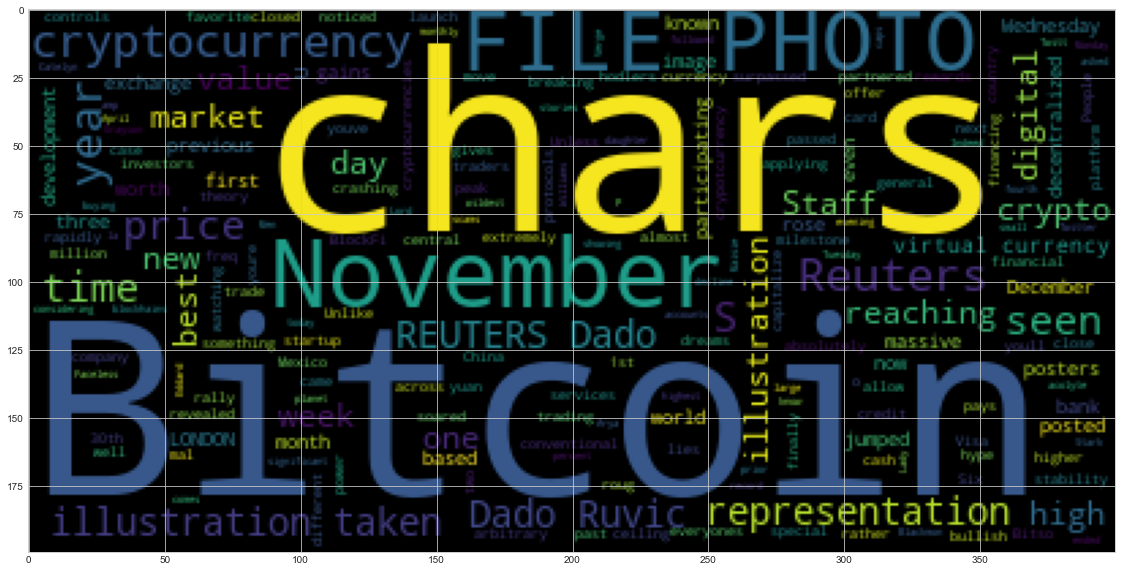

In [25]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_df["text"].str.cat())
plt.imshow(btc_wc)

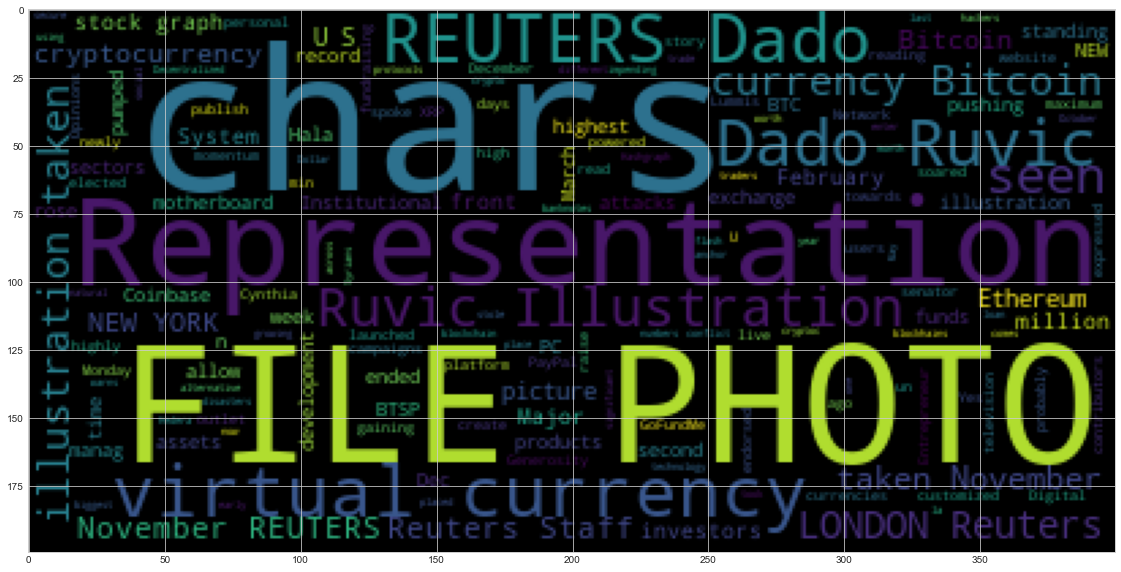

In [26]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_df["text"].str.cat())
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
btc_text=btc_df["text"].str.cat()


In [45]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)
#btc_viz = displacy.render(btc_ner, style='ent')

# Add a title to the document
btc_ner.user_data["title"]="Bitcoin NER"

In [46]:
# Render the visualization
btc_viz = displacy.render(btc_ner, style='ent')

In [34]:
# List all Entities
print([ent.text for ent in btc_ner.ents])

['Visa', 'first', 'Bitcoin', 'November 30th, 2020', 'December 1st', '2020', 'bitcoin', 'above $20,000', 'almost three years', 'the day', 'Bitcoin', '20,000', 'Wednesday', 'November 2017', 'two-month', 'Bitcoin', '10,000', 'first', 'the next 20 days', '19,665', 'digital yuan', 'the People’s Bank of China', 'the past few weeks', 'bitcoin', 'digital', 'hype', 'Mexico', '$62 million', 'chars]4', 'U.S.', 'November', 'today', '500', '10.8 percent', 'November', 'monthly', 'April', 'fourth', 'Grayson Blackmon /', 'One', 'the year', 'the day', 'Twitter', 'Williams', 'Arya Stark', 'Lady Catelyn', 'Eddard', 'acolyte', 'the Faceless Men', 'Monday', 'chars]8', '7', 'Bitcoin', 'above $18,000', 'Tuesday', 'evening', 'December 2017', 'this week', 'more than $18,000', 'chars]6', '6', 'one', 'above $20,000', 'Wednesday', 'a year', 'Reuters', 'Bitcoin', 'U.S.', 'January 6, 2020', 'REUTERS/', 'Dado Ruvic/File Photo', 'LONDON', 'Reuters', 'Bitcoin', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'R

---

## Ethereum NER

In [35]:
# Concatenate all of the bitcoin text together
eth_string=eth_df["text"].str.cat()
eth_string

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S. cryptocurrency… [+1031 chars]FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020

In [43]:
# Run the NER processor on all of the text
eth_text = nlp(eth_string)


# Add a title to the document
eth_text.user_data["title"]="Ethereum NER"

In [44]:
# Render the visualization
eth_viz=displacy.render(eth_text, style='ent')

In [40]:
# List all Entities
print([ent.text for ent in eth_text.ents])

['February 3, 2018', 'REUTERS/', 'Reuters', 'February 3, 2018', 'REUTERS/', 'Reuters', 'Reuters', 'XRP', 'Monday', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'the Generosity Network', '20,000', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'chars]The New York Times', 'Coinbase', '15, 2020', '6 min', 'A few days ago', 'US', 'Cynthia Lummis', 'Bitcoin', 'early February this year', 'last month', 'October', '$24 million', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'U.S.', 'May 26, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'November 1